# Heart Disease Classification
##### In this project, I build  a classifier to predict whether a patient has a heart diseae or not based on certain parameters. The data was gotten from kaggle.The model was build using logistic regression. The model was tested and evaluated.

#### loading dataset

In [61]:
import pandas as pd
df = pd.read_csv("heart_disease.csv")
df.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [62]:
print(df.shape)


(1025, 14)


## Performing data exploration

In [63]:
#data exploration
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### The data consist of 1025 data point and 14 attributes. There is no null value.
 age : Age of the patient
 
 sex: Sex of the patient  
 
 cp: chest pain type (4 values) 
 
 trestbps:resting blood pressure
 
 chol: serum cholestoral in mg/dl
 
 fbs: fasting blood sugar > 120 mg/dl
 
 restecg: resting electrocardiographic results (values 0,1,2)
 
 thalach: maximum heart rate achieved
 
 exang: exercise induced angina
 
 oldpeak:ST depression induced by exercise relative to rest
 
 slope:the slope of the peak exercise ST segment
 
 ca: number of major vessels (0-3) colored by flourosopy
 
 thal:  0 = normal; 1 = fixed defect; 2 = reversable defect
 
 target: The dependent variable. 1 if a patient has heart disease otherwise 0.


In [35]:
df['target'].value_counts()


1    526
0    499
Name: target, dtype: int64

### The target variable consist of 526 ones and 499 zero

## Visualizing the target column

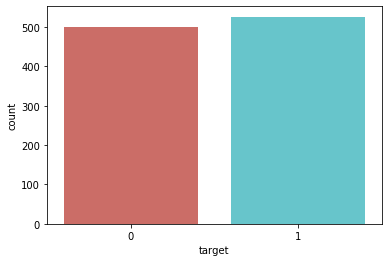

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target',data= df, palette ='hls')
plt.show()



In [37]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


## split data into independent(x) and dependent(y) labels

In [38]:

x = df.drop('target',axis=1)
y = df['target']


In [39]:

x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [40]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# Split data into training and test set
#### I used 80% of the data for training while 20% is use for testing


In [41]:
#import model to split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)



## Trainning the model

In [42]:
#import module for fitting
from sklearn.linear_model import LogisticRegression
#create instance i.e object
model = LogisticRegression()
model.fit(x_train, y_train)


C:\Users\imo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Using the test dataset to predict

In [46]:
y_predict=model.predict(x_test)

In [47]:
y_predict

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [48]:
y_test

49     0
525    1
119    1
629    0
186    0
      ..
860    0
521    1
790    0
340    1
447    0
Name: target, Length: 205, dtype: int64

# Calculating the accuracy of the model


In [45]:
model.score(x,y)

0.8419512195121951

#### From the score, the model is 84% accurate in predicting the whether a patient has a heart disease or not. 
#### The score is not that bad since we don't expect the model in reality to be 100% accurae

# Evaluating the model using confusion matrix

In [55]:
from sklearn.metrics import confusion_matrix

In [59]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[81, 28],
       [11, 85]], dtype=int64)

Text(69.0, 0.5, 'Actual Value')

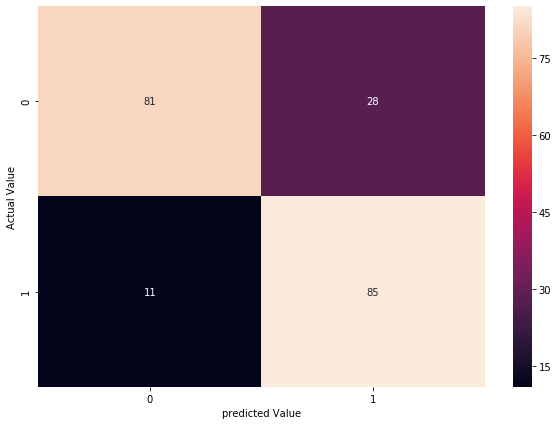

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted Value")
plt.ylabel('Actual Value')

#### From the chart, we can see that 81 times, our actual value was 0 and the model predicted o while 11 times the value was 1 but the model predicted to be 0.
#### Also 85 times the value was 1 and the model predicted to be 1 while 28 times the value was 0 but our model predicted 1.
#### Hence 11 times the model fail in predicting 0 while the model fail 28 times in predicting 1